# KDE - p_rho_dt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from scipy.stats import gaussian_kde

import scipy
from scipy.stats import norm
from scipy import integrate

import warnings
from sklearn.exceptions import InconsistentVersionWarning
warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

from real_gwb_likelihood_Bea import GWBSpectrum

import emcee

import corner

2025-10-02 12:02:44.711773: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = np.genfromtxt('gwb_9bins.txt')

# EPTA DR2 total observation timespan
Tspan = 10.33 * 365.25 * 24 * 3600

# First 9 harmonics of 1/Tspan (< 1\yr)
fs = np.arange(1, 10) / Tspan
print('Frequencies (Hz)', fs)

Frequencies (Hz) [3.06757868e-09 6.13515737e-09 9.20273605e-09 1.22703147e-08
 1.53378934e-08 1.84054721e-08 2.14730508e-08 2.45406295e-08
 2.76082082e-08]


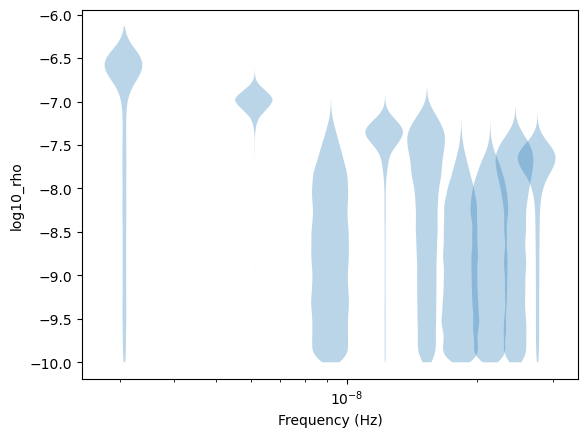

In [3]:
# plot violins
ax = plt.subplot(111)
ax.set_ylabel(r'log10_rho')
ax.violinplot(data, positions=fs, widths=fs*0.2, showmeans=False, showextrema=False)

plt.xlabel('Frequency (Hz)')
plt.xscale('log')
plt.savefig('./spectrum.png', bbox_inches='tight')
plt.show();

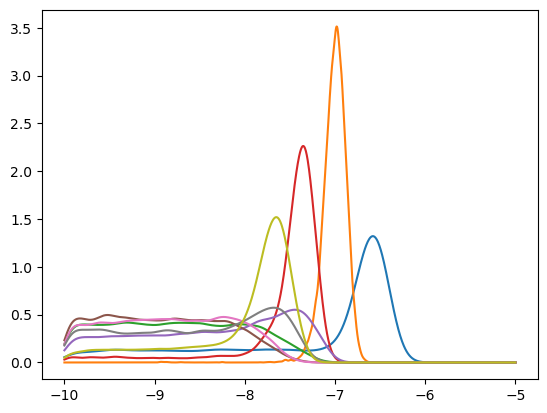

In [4]:
rho_grid = np.linspace(-10, -5, 1000)

p_rho_dt=[]
pdf_rho_dt=[]

for i in range (0,9):
    pdf = gaussian_kde(data[:, i])
    pdf_rho_dt.append(pdf)
    p_rho_dt.append(pdf(rho_grid))
    plt.plot(rho_grid,pdf(rho_grid))

pdf_rho_dt
p_rho_dt = np.column_stack(p_rho_dt)

In [6]:
np.savetxt("p_rho_dt.txt", p_rho_dt)

In [7]:
p_rho_dt = np.genfromtxt("p_rho_dt.txt")

In [8]:
p_rho_dt

array([[5.58052403e-002, 0.00000000e+000, 1.92632860e-001, ...,
        1.93290409e-001, 1.77664768e-001, 5.02087272e-002],
       [5.78423705e-002, 0.00000000e+000, 2.03129601e-001, ...,
        2.04936479e-001, 1.86346150e-001, 5.32569518e-002],
       [5.98727548e-002, 0.00000000e+000, 2.13612689e-001, ...,
        2.16560885e-001, 1.94982690e-001, 5.63011079e-002],
       ...,
       [4.45485138e-028, 0.00000000e+000, 9.12309813e-153, ...,
        1.61109202e-230, 1.85695671e-144, 3.20690343e-221],
       [2.73404551e-028, 0.00000000e+000, 1.59562455e-153, ...,
        1.49563606e-231, 3.86359744e-145, 3.00029294e-222],
       [1.67438861e-028, 0.00000000e+000, 2.77836007e-154, ...,
        1.38095119e-232, 8.00805184e-146, 2.79128101e-223]],
      shape=(1000, 9))

In [9]:
pdf_rho_dt